In [1]:
import pandas as pd
from skimage.io import imread_collection , imshow_collection
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as patches

/local/scratch/22268/ipykernel_1054178/1017906621.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
import os

label_file = "/WAVE/projects/CSEN-342-Wi24/data/pr2/train/labels.txt"

# Create directory for YOLO format labels if it doesn't exist
yolo_label_dir = 'train/labels'
if not os.path.exists(yolo_label_dir):
    os.makedirs(yolo_label_dir)

with open(label_file, 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip().split(' ')
    image_id, class_label, cx, cy, w, h = line

    # Create YOLO format label string
    yolo_label = f"{int(class_label) - 1} {float(cx)/960:.6f} {float(cy)/540:.6f} {float(w)/960:.6f} {float(h)/540:.6f}"

    # Create label file path
    label_path = os.path.join(yolo_label_dir, f"{int(image_id):05d}.txt")

    # Write YOLO format label to file
    with open(label_path, 'a') as label_file:
        label_file.write(yolo_label + '\n')

In [2]:
label_file = "/WAVE/projects/CSEN-342-Wi24/data/pr2/val/labels.txt"

# Create directory for YOLO format labels if it doesn't exist
yolo_label_dir = 'val/labels'
if not os.path.exists(yolo_label_dir):
    os.makedirs(yolo_label_dir)

with open(label_file, 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip().split(' ')
    image_id, class_label, cx, cy, w, h = line

    # Create YOLO format label string
    yolo_label = f"{int(class_label) - 1} {float(cx)/960:.6f} {float(cy)/540:.6f} {float(w)/960:.6f} {float(h)/540:.6f}"

    # Create label file path
    label_path = os.path.join(yolo_label_dir, f"{int(image_id):05d}.txt")

    # Write YOLO format label to file
    with open(label_path, 'a') as label_file:
        label_file.write(yolo_label + '\n')

In [2]:
train_image_path = "/WAVE/projects/CSEN-342-Wi24/data/pr2/train/images"
train_data = pd.read_csv( "/WAVE/projects/CSEN-342-Wi24/data/pr2/train/labels.txt", sep=' ', header=None)
train_data.columns=['Image_No','Class','cx','cy','w','h']

In [3]:
val_data = pd.read_csv("/WAVE/projects/CSEN-342-Wi24/data/pr2/val/labels.txt",header=None,delimiter = ' ' )
val_data.columns=['Image_No','Class','cx','cy','w','h'] 

In [4]:
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder)[:10]:

        images[int(filename.replace(".jpeg",""))] = cv2.imread(os.path.join(folder,filename))

    return images

In [5]:
images = load_images_from_folder(train_image_path)

In [6]:
print(images.keys())


dict_keys([3, 24, 36, 82, 83, 86, 88, 114, 121, 169])


In [7]:
image1 = images[3]
image2 = images[24]
image3 = images[36]
image4 = images[82]
image5 = images[83]
image6 = images[86]

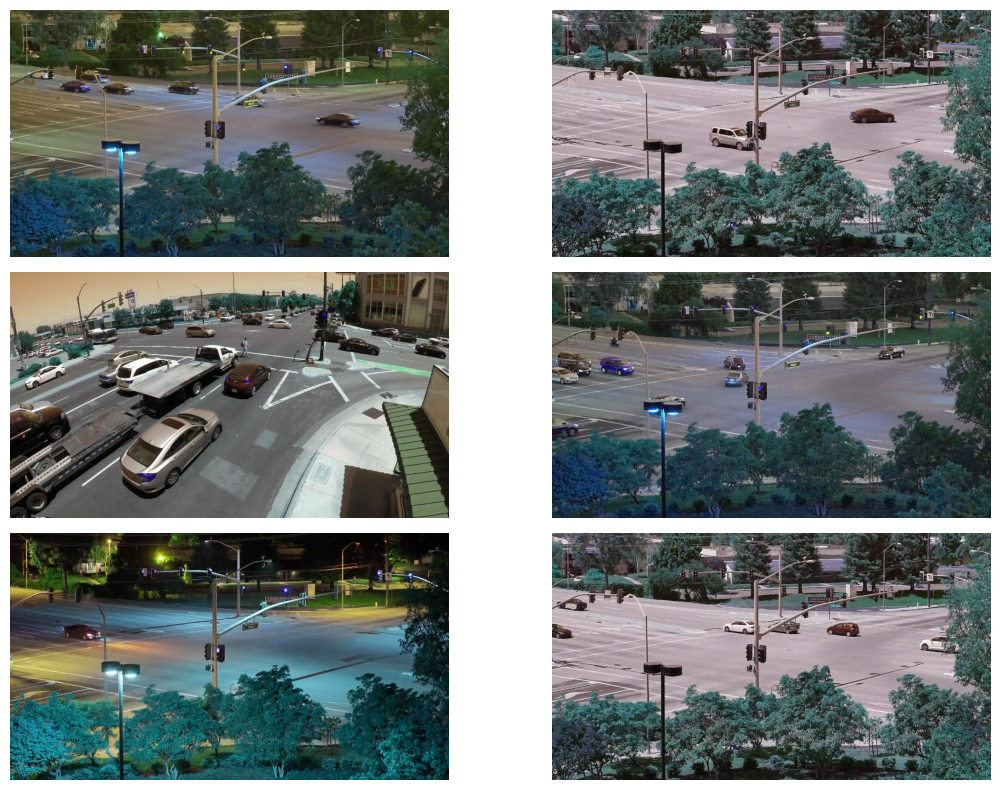

In [8]:

image_list = [image1, image2, image3, image4, image5, image6]

fig, axes = plt.subplots(3, 2, figsize=(12, 8))  

for i, ax in enumerate(axes.flat): 
    ax.imshow(image_list[i])
    ax.axis('off') 

plt.tight_layout() 
plt.show()


In [9]:
train_data_labels1 = train_data[train_data["Image_No"].isin(images.keys())]


In [10]:
color_mapper={0:'Red',1:'Green',2:'Blue',3:"Purple",4:"Yellow",5:"Brown",6:"Pink",7:"Orange"}

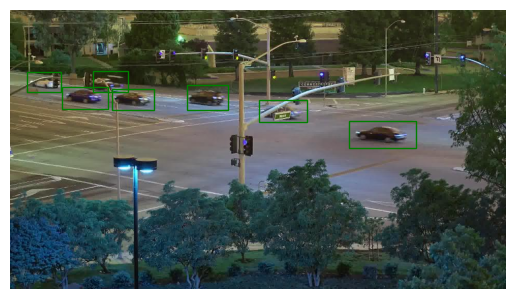

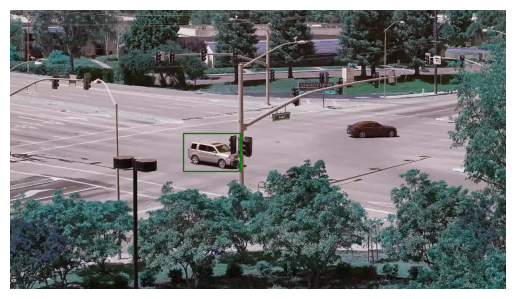

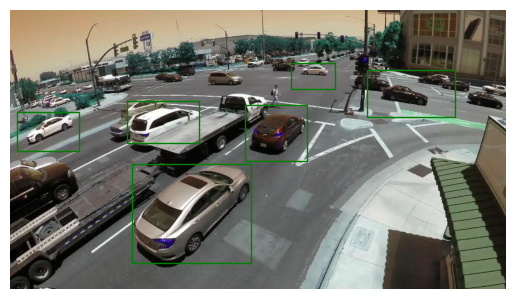

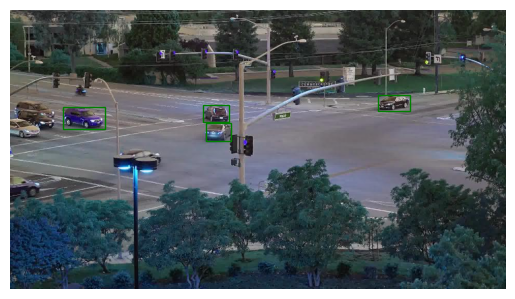

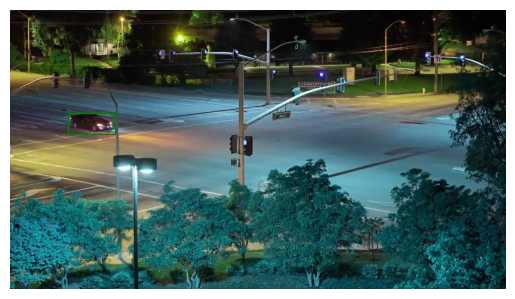

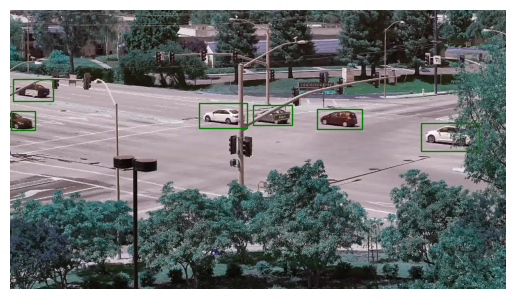

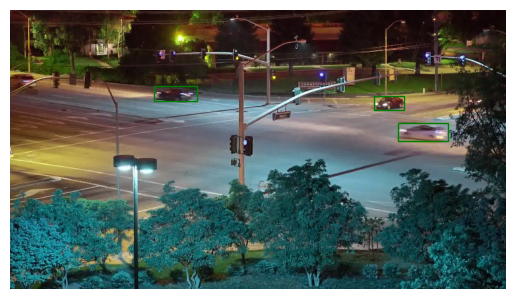

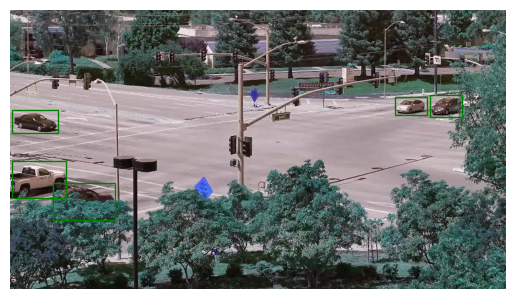

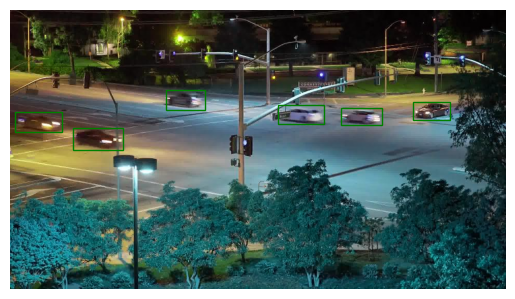

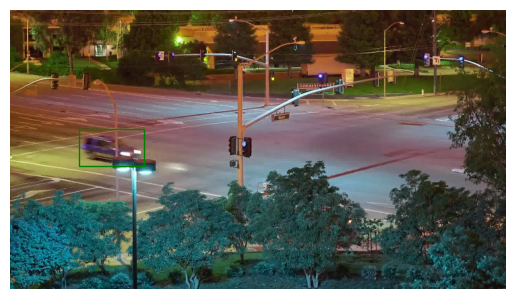

In [11]:

grps = train_data_labels1.groupby(by="Image_No")
for i in grps.groups:
    fig, ax = plt.subplots()
    for j,row in grps.get_group(i).iterrows():
        ax.imshow(images[i])
        x = row['cx'] - (row['w']//2)
        y = row['cy'] - (row['h']//2)
        rect = patches.Rectangle((x, y), row['w'], row['h'], linewidth=1, edgecolor=color_mapper[row['Class']],facecolor='none')
        ax.add_patch(rect)
        plt.axis("off")

In [12]:
# Freezing model layers for faster training
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 15
    print(f"Freezing {num_freeze} layers")
    freeze = [f'model.{x}.' for x in range(num_freeze)]  # layers to freeze 
    for k, v in model.named_parameters(): 
        v.requires_grad = True  # train all layers 
        if any(x in k for x in freeze): 
            print(f'freezing {k}') 
            v.requires_grad = False 
    print(f"{num_freeze} layers are freezed.")

In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.16 🚀 Python-3.9.18 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080, 8114MiB)
Setup complete ✅ (8 CPUs, 30.8 GB RAM, 29.8/70.0 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [9]:
!pip show YOLO

Name: yolo
Version: 0.3.2
Summary: Manage AWS infrastructure and microservices across multiple stages/accounts
Home-page: UNKNOWN
Author: 
Author-email: 
License: UNKNOWN
Location: /WAVE/users/unix/smachal/.local/lib/python3.9/site-packages
Requires: awscli, boto3, botocore, click, docker, jinja2, keyring, keyrings.alt, requests, ruamel.yaml, tabulate, voluptuous
Required-by: 


In [10]:
#executed this command form CLI
!yolo task=detect mode=train epochs=3 data=custom.yaml model=yolov8n.pt batch=8 imgsz=640

/bin/bash: yolo: command not found


In [13]:
model = YOLO('runs/detect/train5/weights/best.pt')
source =  "/WAVE/projects/CSEN-342-Wi24/data/pr2/test/images"

# Run inference on the source
results = model.predict(source, save_txt = True, save_conf = True, conf = 0.05) 



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2000 /WAVE/projects/CSEN-342-Wi24/data/pr2/test/images/00001.jpeg: 384x640 23 cars, 1 large_truck, 7.0ms
image 2/2000 /WAVE/projects/CSEN-342-Wi24/data/pr2/test/images/00002.jpeg: 384x640 3 cars, 8.7ms
image 3/2000 /WAVE/projects/CSEN-342-Wi24/data/pr2/test/images/00003.jpeg: 384x640 25 cars, 5.7ms
image 4/2000 /WAVE/projects/CSEN-342-Wi24/data/pr2/test/images/00004.jpeg: 384x640 13 cars, 5.8ms
image 5/2000 /WAVE/projects/CSEN-342-Wi24/data/pr2

In [4]:
# Navigate to the directory containing the text files
import os
os.chdir("/WAVE/users/unix/smachal/runs/detect/predict/labels")

# Combine all the text files in the directory
with open("predictions.txt", "w") as outfile:
    for filename in os.listdir("."):
        if filename.endswith(".txt"):
            with open(filename) as infile:
                for line in infile:
                    outfile.write(line)

In [ ]:
def convert_first_digit(line):
    parts = line.split()
    first_digit = int(parts[0])
    if first_digit == 0:
        parts[0] = '1'
    elif first_digit == 1:
        parts[0] = '2'
    elif first_digit == 2:
        parts[0] = '3'
    return ' '.join(parts) + '\n'

file_path = '/WAVE/users/unix/smachal/runs/detect/predict/labels/predictions.txt'

# Read the file into memory
with open(file_path, 'r') as file:
    lines = file.readlines()

# Modify the lines
modified_lines = [convert_first_digit(line) for line in lines]

# Write back to the same file
with open(file_path, 'w') as file:
    file.writelines(modified_lines)


In [16]:
directory = "/WAVE/users/unix/smachal/runs/detect/predict/labels"
output_file = "/WAVE/users/unix/smachal/runs/combined_output.txt"

# Mapping to change labels from 0, 1, 2 to 1, 2, 3
label_mapping = {'0': '1', '1': '2', '2': '3'}

# Open the output file in write mode
with open(output_file, 'w') as outfile:
    # Loop through each text file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            try:
                # Open each text file and read its contents
                with open(file_path, 'r') as infile:
                    # Read each line and update the label accordingly
                    for line in infile:
                        # Split the line into parts
                        parts = line.strip().split(' ')
                        # Update the label using the mapping
                        parts[0] = label_mapping.get(parts[0], parts[0])
                        # Write the modified line to the output file
                        outfile.write(' '.join(parts) + '\n')
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

print("Combined output file created:", output_file)


Combined output file created: /WAVE/users/unix/smachal/runs/combined_output.txt
